# Вычисление экваториальных координат кометы на Keras

Для нахождения регресcии между пиксельными координатами и экваториальными используется
модель на keras. https://keras.io

Данные для модели подготавливаются в модуле PrepareData

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import NotebookLoader
from PrepareData import load_stars, load_comet

importing Jupyter notebook from PrepareData.ipynb
PrepareData v1.07 15.08.2020


In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [3]:
(x_train, y_train), (x_test, y_test), (mean, std) = load_stars()

In [56]:
# Функция для построения графиков истории обучения
def visualizeUlaHistory(history, test_loss, figsize=(8,5)):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    t_loss = [test_loss[0]]*len(loss)
    plt.figure(figsize=figsize)
    plt.plot(loss, label='Среднекв. ошибка на обучающем наборе')
    plt.plot(val_loss, label='Среднекв. ошибка на проверочном наборе')
    plt.plot(t_loss, label='Среднекв. ошибка на тестовом наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Среднекв. ошибка')
    plt.title('Среднекв. ошибка')
    plt.ylim(0, .1)
    plt.legend()
    plt.show()

In [53]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               600       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.1)

Train on 27 samples, validate on 3 samples
Epoch 1/100
27/27 [==============================] - 1s 23ms/sample - loss: 0.9358 - mae: 0.8310 - val_loss: 0.5399 - val_mae: 0.5237
Epoch 2/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.5579 - mae: 0.6329 - val_loss: 0.3132 - val_mae: 0.4296
Epoch 3/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.3114 - mae: 0.4645 - val_loss: 0.1978 - val_mae: 0.3929
Epoch 4/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.1927 - mae: 0.3479 - val_loss: 0.1563 - val_mae: 0.3520
Epoch 5/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.1396 - mae: 0.2817 - val_loss: 0.1344 - val_mae: 0.2928
Epoch 6/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.1089 - mae: 0.2342 - val_loss: 0.1421 - val_mae: 0.2778
Epoch 7/100
27/27 [==============================] - 0s 3ms/sample - loss: 0.0919 - mae: 0.2047 - val_loss: 0.1378 - val_mae: 0.2580
Epoch 8/100
27/27 [======

Epoch 62/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0042 - mae: 0.0449 - val_loss: 0.0021 - val_mae: 0.0360
Epoch 63/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0040 - mae: 0.0399 - val_loss: 0.0020 - val_mae: 0.0344
Epoch 64/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0037 - mae: 0.0415 - val_loss: 0.0020 - val_mae: 0.0340
Epoch 65/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0034 - mae: 0.0396 - val_loss: 0.0021 - val_mae: 0.0338
Epoch 66/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0038 - mae: 0.0383 - val_loss: 0.0024 - val_mae: 0.0341
Epoch 67/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0036 - mae: 0.0399 - val_loss: 0.0019 - val_mae: 0.0342
Epoch 68/100
27/27 [==============================] - 0s 2ms/sample - loss: 0.0032 - mae: 0.0358 - val_loss: 0.0017 - val_mae: 0.0318
Epoch 69/100
27/27 [==============================] - 0s 2ms/s

6/6 [==============================] - 0s 667us/sample - loss: 0.0011 - mae: 0.0224
[0.0011185337789356709, 0.022390798]
Средняя квад. ошибка на тестовых данных: 0.0011


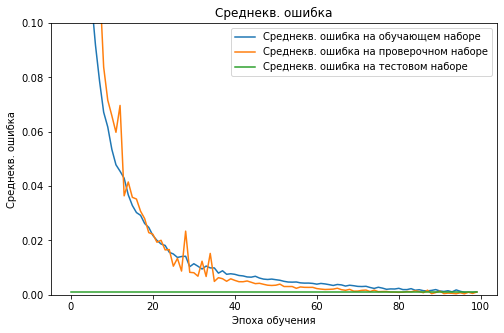

In [57]:
# Оценим результаты обучения:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
test_loss = scores
print("Средняя квад. ошибка на тестовых данных: %.4f" % test_loss[0])
visualizeUlaHistory(history, test_loss)

In [58]:
std

array([5.56082752e+02, 1.47149227e+02, 1.50259970e-01, 5.88907974e-01])

In [59]:
x_comet = load_comet(mean, std)

In [60]:
x_comet = np.array(x_comet, dtype=np.float32)
x_comet

array([[ 1.4863396 ,  0.7490506 ],
       [ 1.4485754 ,  0.5859509 ],
       [ 1.4072146 ,  0.41605535],
       [ 1.360459  ,  0.26654726],
       [ 1.3083085 ,  0.12383498],
       [ 1.250763  , -0.01887728],
       [ 1.1878228 , -0.1479979 ],
       [ 1.1176894 , -0.25673106],
       [ 1.042161  , -0.3586684 ],
       [ 0.9630361 , -0.4470141 ],
       [ 0.87312144, -0.528564  ],
       [ 0.7814085 , -0.5897263 ],
       [ 0.68070406, -0.6440929 ],
       [ 0.5728064 , -0.68486786],
       [ 0.46131223, -0.7052553 ],
       [ 0.34262487, -0.7256428 ],
       [ 0.21854262, -0.7256428 ],
       [ 0.09086377, -0.71205115],
       [-0.02422701, -0.6916637 ],
       [-0.17888024, -0.65768456],
       [-0.31555057, -0.6101138 ],
       [-0.45581746, -0.5625431 ],
       [-0.594286  , -0.5013807 ],
       [-0.7309564 , -0.43342245],
       [-0.86762667, -0.3654642 ],
       [-1.0024986 , -0.297506  ],
       [-1.1319758 , -0.22954777],
       [-1.2578564 , -0.16158955],
       [-1.3765438 ,

In [61]:
y_comet = model.predict(x_comet)

In [62]:
y_comet

array([[-1.2804321 , -1.409802  ],
       [-1.1086161 , -1.3983371 ],
       [-0.922116  , -1.3906773 ],
       [-0.7304471 , -1.3756729 ],
       [-0.5417911 , -1.3565675 ],
       [-0.3464949 , -1.3330203 ],
       [-0.16019341, -1.2991776 ],
       [ 0.00821186, -1.2577488 ],
       [ 0.1704407 , -1.2086881 ],
       [ 0.3216894 , -1.1499093 ],
       [ 0.47848773, -1.0843174 ],
       [ 0.62660277, -1.0079114 ],
       [ 0.7816067 , -0.91162324],
       [ 0.9306424 , -0.7917329 ],
       [ 1.0530657 , -0.65876627],
       [ 1.141557  , -0.5068613 ],
       [ 1.2030952 , -0.3419663 ],
       [ 1.2311045 , -0.18181811],
       [ 1.2314245 , -0.04724962],
       [ 1.2013998 ,  0.12671468],
       [ 1.1394432 ,  0.28327626],
       [ 1.0201504 ,  0.45291245],
       [ 0.83994144,  0.6061775 ],
       [ 0.6207357 ,  0.7379835 ],
       [ 0.38625854,  0.8655896 ],
       [ 0.15078884,  0.98914033],
       [-0.07196944,  1.0998467 ],
       [-0.28320143,  1.2009596 ],
       [-0.4747029 ,

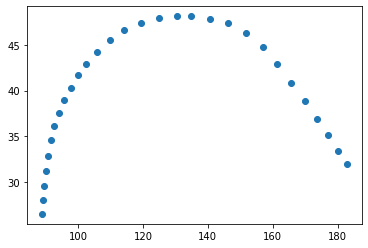

In [63]:
rads = (y_comet*std[2:4] + mean[2:4])*180./math.pi
plt.scatter(rads[:,1], rads[:,0])

In [64]:
score = model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 666us/sample - loss: 0.0011 - mae: 0.0224


In [65]:
score

[0.0011185337789356709, 0.022390798]

In [66]:
std

array([5.56082752e+02, 1.47149227e+02, 1.50259970e-01, 5.88907974e-01])

In [67]:
# считаем что вклад в ошибку поровну от склонения и прямого восхождения.
D = 0.5*score[0]**2
D

6.255589073100561e-07

In [70]:
# ошибка в минутах дуги по склонению
std1 = pow(D, 0.5)*std[2]
std1*180*60/3.14

0.4087629384455368

In [72]:
# ошибка в минутах дуги по прямому восхождению
std2 = pow(D, 0.5)*std[3]
std2*180*60/3.14

1.6020484578507515